In [1]:
import unicodecsv
import pandas as pd
import numpy as np

#read data from CSV file and make it to lists|
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

In [2]:
data = pd.read_csv('ex2data1.txt', header=None, names = ['x1', 'x2', 'class'])
data

,x1,x2,class
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


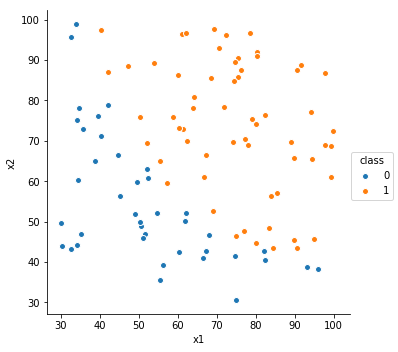

In [193]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(x_vars=["x1"], y_vars=["x2"], data=data, hue="class", size=5)


In [95]:
from sklearn.cross_validation import train_test_split
X = data[['x1','x2']]
x1 = data['x1']
x2 = data['x2']
y = data[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)
train_test_split

<function sklearn.cross_validation.train_test_split>

In [96]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [97]:
predictions = logmodel.predict(X_test)

In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.44      0.62        18
          1       0.69      1.00      0.81        22

avg / total       0.83      0.75      0.73        40

[[ 8 10]
 [ 0 22]]


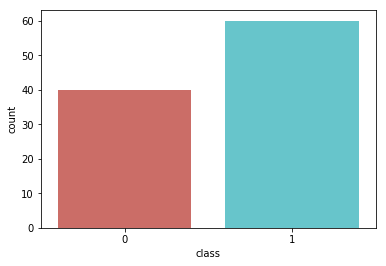

In [8]:
sns.countplot(x='class', data=data, palette = 'hls')

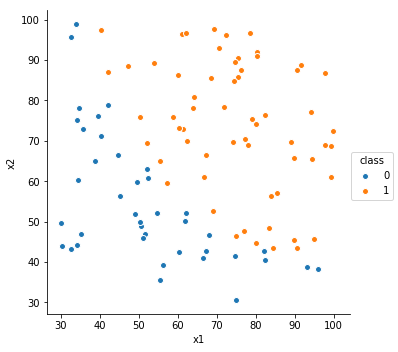

In [9]:
import matplotlib.pyplot as plt  

sns.pairplot(x_vars=["x1"], y_vars=["x2"], data=data, hue="class", size=5)
plt.show()

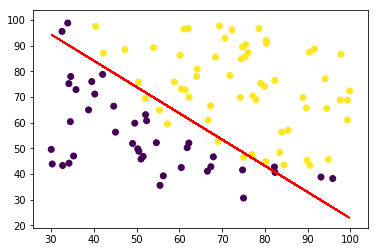

In [321]:
plt.plot(X, (-0.206*X+25.161)/0.201 , 'r')
plt.scatter(data['x1'], data['x2'], c=data['class'])
plt.show()

In [11]:
from math import exp
1/(1+exp(.0148409*20 + .0139422*20 -1.297497))

0.6730109685197058

# Logistic Model

In [3]:
import matplotlib.pyplot as plt 
import numpy as np
from math import log
from math import exp
%matplotlib inline

y = data['class'].values.tolist()
data.loc[:,'1'] = 1
data.drop(data.index[len(data)-1])
data2 = data
cols = data2.columns.tolist()
cols = cols[-1:] + cols[:-1]
data3 = data2[cols]
del data3['class']
data3=data3.values
data3
X = data3
y = data2['class']
initial_theta = np.array([0, 0, 0])

In [44]:
def cost_func(X, y, theta, p):
    m = len(X)
    J = sum(y*np.log(p)+((1-y)*np.log(1-p)))*(-1/m)
    return J

iterate = 1000
learning_rate = 0.001
def grad_func(X, y, theta, iterate, learning_rate):
    J = []
    for item in range(iterate):
        t = X.dot(theta)
        for i in t:
            p = 1/(1+np.exp(-t))
        m = len(X)
        grad_theta0 = sum((p - y) * X[:, 0]) * (1/m)
        grad_theta1 = sum((p - y) * X[:, 1]) * (1/m)
        grad_theta2 = sum((p - y) * X[:, 2]) * (1/m)
        
        gradient = np.array([grad_theta0, grad_theta1, grad_theta2])
        cost = cost_func(X, y, theta, p)
        J.append(cost)
        theta = theta - learning_rate * gradient
    plt.plot(J)
    plt.show(J)
    print(J[0])
    return theta, cost

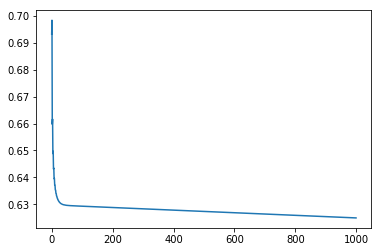

0.69314718056


(array([-0.06946097,  0.01090733,  0.00099135]), 0.62499055225344002)

In [45]:
grad_func(X, y, initial_theta , iterate, learning_rate)

# Test

In [4]:
X = data3
y = data2[['class']]
X = np.array(X.values)
y = np.array(y.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [19]:
iterate = 10000
learning_rate = 0.001
theta = np.array([0.,0.,0.])
initial_theta = np.array([0.,0.,0.])

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def cost_func(X, y, theta):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

def grad_func(X, y, theta):
    X = np.matrix(X)
    y = np.matrix(y)
    theta = np.matrix(theta)
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    error = sigmoid(X * theta.T) - y
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    return grad

def min_cost(X, y, theta, learning_rate, iterate):
    J = []
    for i in range(iterate):
        grad = grad_func(X, y, theta)
        cost = cost_func(X, y, theta)
        J.append(cost)
        gradient = grad
        theta = theta - learning_rate * gradient
    return J , theta
    #plt.plot(J)
    #plt.show(J)

In [20]:
min_cost(X, y, theta, learning_rate, iterate)

([0.69314718055994529,
  0.69829068936677541,
  0.65971176321643044,
  0.6616272696122697,
  0.64886153446190675,
  0.6496960933384357,
  0.64310986582309637,
  0.64346520840315602,
  0.63952522913045673,
  0.63964339855955732,
  0.63709581436580653,
  0.63709203194868091,
  0.63536394118640505,
  0.63529843161068955,
  0.63408776680059775,
  0.63399367189495248,
  0.63312564672568383,
  0.63302160213568348,
  0.63238831187870159,
  0.63228473756351844,
  0.63181635316313445,
  0.63171885181662246,
  0.63136855966952887,
  0.63127986065086317,
  0.63101541454879151,
  0.63093653251588511,
  0.63073524447627249,
  0.63066618920960849,
  0.6305118243674821,
  0.63045204235041175,
  0.63033282354194609,
  0.63028147371196253,
  0.63018876086736431,
  0.63014488539873847,
  0.6300722801235662,
  0.63003490780977278,
  0.62997763397534601,
  0.62994584009637844,
  0.62990030815003739,
  0.62987324633641295,
  0.62983674251578847,
  0.62981365881979712,
  0.62978412081823743,
  0.62976435675

In [7]:
cost_func(X, y, theta)

0.69314718055994529

In [120]:
y = data['class'].values.tolist()
data.loc[:,'1'] = 1
data.drop(data.index[len(data)-1])
data2 = data
cols = data2.columns.tolist()
cols = cols[-1:] + cols[:-1]
data3 = data2[cols]
del data3['class']

In [117]:
X = data3
y = data2[['class']]

X = np.array(X.values)
y = np.array(y.values)
theta = np.array([0,0,0])

cost_func(X, y, theta)

0.69314718055994529

In [123]:
min_cost(X, y, theta, learning_rate, iterate)

([69.314718055994533, 347.88593938303808],
 matrix([[-0.00299351, -0.19664299, -0.19834039]]))

In [148]:
theta = np.array([0.,0.,0.])
X = np.matrix(X)
y = np.matrix(y)
y = y.T
import scipy.optimize as opt
cost_opt = opt.fmin_tnc(func = cost_func, x0 = theta, fprime = grad_func, args=(X,y))

ValueError: shapes (3,) and (100,1) not aligned: 3 (dim 0) != 100 (dim 0)

In [139]:
X = data3
y = data2['class']
theta = np.array([0,0,0])

#def gradient(theta, X, y):  
theta = np.matrix(theta)
X = np.matrix(X)
y = np.matrix(y)

parameters = int(theta.ravel().shape[1])
grad = np.zeros(parameters)

error = sigmoid(X * theta.T) - y

for i in range(parameters):
    term = np.multiply(error, X[:,i])
    grad[i] = np.sum(term) / len(X)
print(grad)



[ -10.         -656.44274057 -662.21998088]


In [140]:
theta = np.array([0,0,0])
iterate = 100
learning_rate = 0.01
#def grad_func(X, y, theta, iterate, learning_rate):
J = []
for item in range(iterate):
    t = X.dot(theta)
    for i in t:
        p = 1/(1+np.exp(-t))
    m = len(X)
    grad_theta0 = sum((p - y) * X[:, 0]) * (1/m)
    grad_theta1 = sum((p - y) * X[:, 1]) * (1/m)
    grad_theta2 = sum((p - y) * X[:, 2]) * (1/m)
#def cost_func(X, y, theta, p):
    m = len(X)
    J = sum(y*np.log(p)+((1-y)*np.log(1-p)))*(-1/m)
    gradient = np.array([grad_theta0, grad_theta1, grad_theta2])
    theta = theta - learning_rate * gradient
#    cost = cost_func(X, y, theta, p)


ValueError: shapes (1,100) and (1,100) not aligned: 100 (dim 1) != 1 (dim 0)

In [61]:
theta

array([-0.07510202,  0.33930596, -0.08094876])

In [72]:
p

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [13]:
theta = np.array([0,0,0])
t = X.dot(theta)
for i in t:
    p = 1/(1+np.exp(-t))
p

array([ 0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,  0.5,
        0.5])

In [97]:
sum((p - y) * X[:, 2]) * (1/m)

-0.00053389368361795426

In [98]:
t.shape

(100,)

In [199]:
p = X.dot(theta)
p
X.shape

(100, 3)

In [205]:
def sigmoid(X):
    '''Compute the sigmoid function '''
    #d = zeros(shape=(X.shape))

    den = 1.0 + e ** (-1.0 * X)

    d = 1.0 / den

    return d


def compute_cost(theta,X,y): #computes cost given predicted and actual values
    m = X.shape[0] #number of training examples
    theta = reshape(theta,(len(theta),1))

    #y = reshape(y,(len(y),1))
    
    J = (1./m) * (-transpose(y).dot(log(sigmoid(X.dot(theta)))) - transpose(1-y).dot(log(1-sigmoid(X.dot(theta)))))
    
    grad = transpose((1./m)*transpose(sigmoid(X.dot(theta)) - y).dot(X))
    #optimize.fmin expects a single value, so cannot return grad
    return J[0][0]#,grad


def compute_grad(theta, X, y):

    #print theta.shape

    theta.shape = (1, 3)

    grad = zeros(3)

    h = sigmoid(X.dot(theta.T))

    delta = h - y

    l = grad.size

    for i in range(l):
        sumdelta = delta.T.dot(X[:, i])
        grad[i] = (1.0 / m) * sumdelta * - 1

    theta.shape = (3,)

    return  grad

In [206]:
def cost_func(X, y, theta, p):
    m = len(X)
    J = sum(y*np.log(p)+((1-y)*np.log(1-p)))*(-1/m)
    return J

iterate = 2000
learning_rate = 0.001
def grad_func(X, y, theta, iterate, learning_rate):
    J = []
    for item in range(iterate):
        t = X.dot(theta)
        for i in t:
            p = 1/(1+np.exp(-t))
        m = len(X)
        grad_theta0 = sum((p - y) * X[:, 0]) * (1/m)
        grad_theta1 = sum((p - y) * X[:, 1]) * (1/m)
        grad_theta2 = sum((p - y) * X[:, 2]) * (1/m)
        
        gradient = np.array([grad_theta0, grad_theta1, grad_theta2])
        cost = cost_func(X, y, theta, p)
        J.append(cost)
        theta = theta - learning_rate * gradient
    plt.plot(J)
    plt.show(J)
    print(J[0])
    return theta, cost

NameError: name 'zeros' is not defined